In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load Dataset
application_train = pd.read_csv("application_train.csv")
previous_application = pd.read_csv("previous_application.csv")
bureau = pd.read_csv("bureau.csv")
pos_cash_balance = pd.read_csv("POS_CASH_balance.csv")
credit_card_balance = pd.read_csv("credit_card_balance.csv")
installments_payments = pd.read_csv("installments_payments.csv")

In [5]:
print("Application Train:", application_train.shape)
print(application_train.columns.tolist())

Application Train: (307511, 122)
['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_B

In [6]:
print("Previous Application:", previous_application.shape)
print(previous_application.columns.tolist())

Previous Application: (1670214, 37)
['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


In [7]:
print("Bureau:", bureau.shape)
print(bureau.columns.tolist())

Bureau: (1716428, 17)
['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY']


In [8]:
print("POS Cash Balance:", pos_cash_balance.shape)
print(pos_cash_balance.columns.tolist())

POS Cash Balance: (10001358, 8)
['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD', 'SK_DPD_DEF']


In [9]:
print("Credit Card Balance:", credit_card_balance.shape)
print(credit_card_balance.columns.tolist())

Credit Card Balance: (3840312, 23)
['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD', 'SK_DPD_DEF']


In [10]:
print("Installments Payments:", installments_payments.shape)
print(installments_payments.columns.tolist())

Installments Payments: (13605401, 8)
['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION', 'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT', 'AMT_PAYMENT']


In [11]:
# Feature Engineering
bureau_agg = bureau.groupby("SK_ID_CURR").agg({
    "AMT_CREDIT_SUM_DEBT": "sum",
    "SK_ID_BUREAU": "count",
    "AMT_CREDIT_SUM_OVERDUE": "sum",
    "AMT_CREDIT_SUM": "sum"
}).rename(columns={
    "AMT_CREDIT_SUM_DEBT": "TOTAL_DEBT",
    "SK_ID_BUREAU": "N_CREDITS",
    "AMT_CREDIT_SUM_OVERDUE": "TOTAL_OVERDUE",
    "AMT_CREDIT_SUM": "TOTAL_CREDIT"
})
bureau_agg["OVERDUE_RATIO"] = bureau_agg["TOTAL_OVERDUE"] / (bureau_agg["TOTAL_CREDIT"] + 1)

installments_payments["LATE_FLAG"] = (
    installments_payments["DAYS_ENTRY_PAYMENT"] - installments_payments["DAYS_INSTALMENT"]
) > 0
installments_agg = installments_payments.groupby("SK_ID_CURR").agg({
    "LATE_FLAG": "mean"
}).rename(columns={"LATE_FLAG": "LATE_PAYMENT_RATIO"})

credit_card_balance["UTILIZATION"] = (
    credit_card_balance["AMT_BALANCE"] / (credit_card_balance["AMT_CREDIT_LIMIT_ACTUAL"] + 1)
)
cc_agg = credit_card_balance.groupby("SK_ID_CURR").agg({
    "UTILIZATION": "mean"
}).rename(columns={"UTILIZATION": "MEAN_UTILIZATION"})

prev_agg = previous_application.groupby("SK_ID_CURR").agg({
    "NAME_CONTRACT_STATUS": lambda x: (x == "Refused").mean()
}).rename(columns={"NAME_CONTRACT_STATUS": "REFUSED_RATIO"})

app_train_enriched = (
    application_train.merge(bureau_agg, on="SK_ID_CURR", how="left")
    .merge(installments_agg, on="SK_ID_CURR", how="left")
    .merge(cc_agg, on="SK_ID_CURR", how="left")
    .merge(prev_agg, on="SK_ID_CURR", how="left")
)

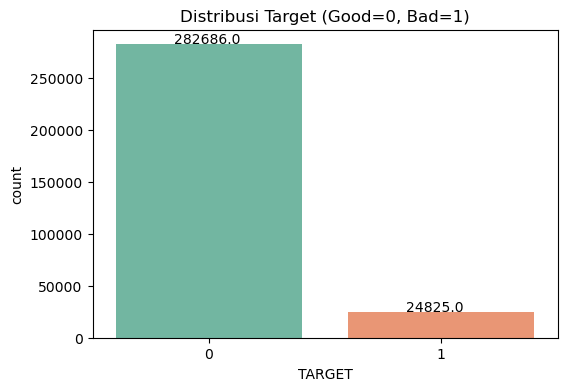

In [12]:
# Grafik 1: Distribusi Target (Good=0, Bad=1)
plt.figure(figsize=(6,4))
sns.countplot(x='TARGET', data=application_train, palette="Set2")
plt.title("Distribusi Target (Good=0, Bad=1)")
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + 0.25, p.get_height() + 500))
plt.show()

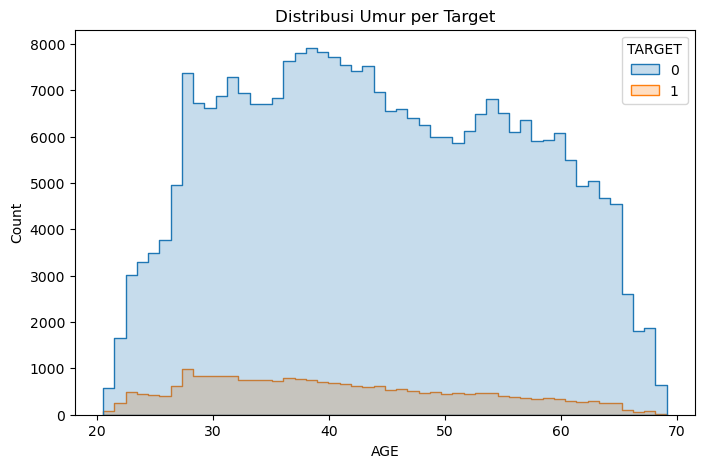

In [13]:
# Grafik 2: Distribusi Umur per Target
application_train['AGE'] = (-application_train['DAYS_BIRTH']) / 365
plt.figure(figsize=(8,5))
sns.histplot(data=application_train, x='AGE', hue='TARGET', bins=50, kde=False, element="step", stat="count")
plt.title("Distribusi Umur per Target")
plt.show()

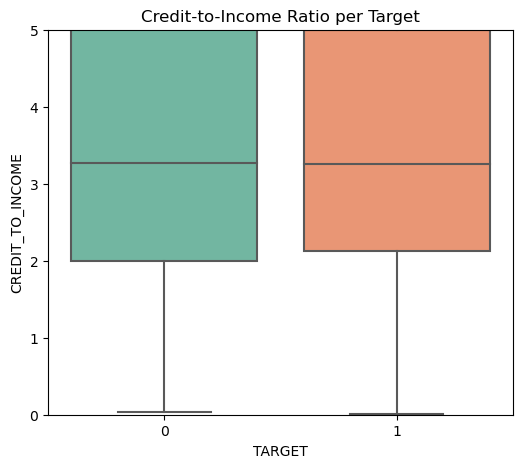

In [14]:
# Grafik 3: Credit-to-Income Ratio per Target
application_train['CREDIT_TO_INCOME'] = application_train['AMT_CREDIT'] / (application_train['AMT_INCOME_TOTAL']+1)
plt.figure(figsize=(6,5))
sns.boxplot(x='TARGET', y='CREDIT_TO_INCOME', data=application_train, palette="Set2")
plt.ylim(0,5)
plt.title("Credit-to-Income Ratio per Target")
plt.show()

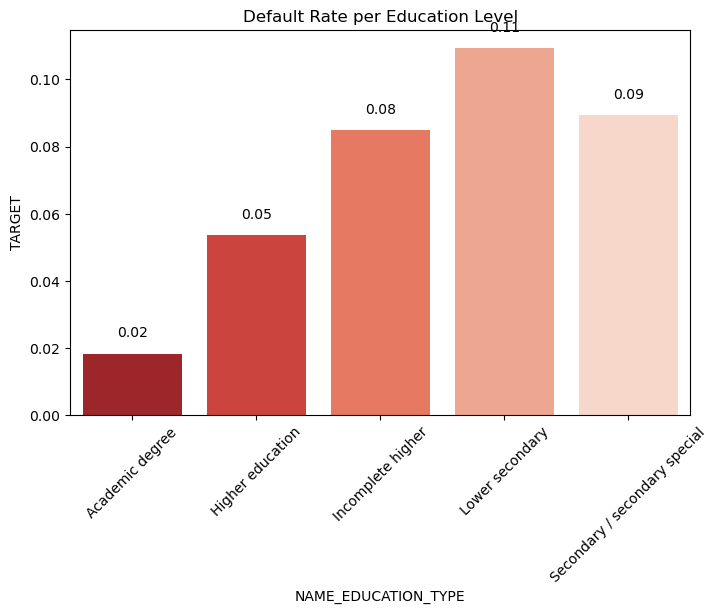

In [15]:
# Grafik 4: Default Rate per Education Level
edu_default = application_train.groupby("NAME_EDUCATION_TYPE")["TARGET"].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='NAME_EDUCATION_TYPE', y='TARGET', data=edu_default, palette="Reds_r")
plt.title("Default Rate per Education Level")
plt.xticks(rotation=45)
for i, v in enumerate(edu_default['TARGET']):
    plt.text(i, v + 0.005, f"{v:.2f}", ha='center')
plt.show()

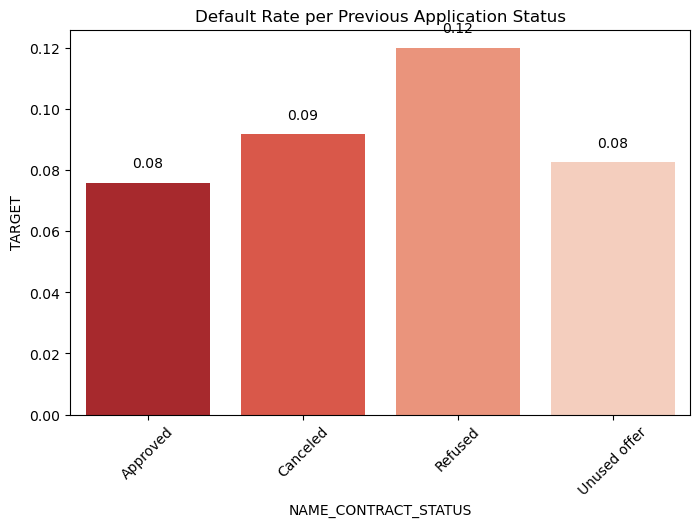

In [16]:
# Grafik 5: Default Rate per Previous Application Status
if "NAME_CONTRACT_STATUS" in previous_application.columns:
    merged_prev = previous_application.merge(application_train[["SK_ID_CURR","TARGET"]], on="SK_ID_CURR", how="left")
    prev_default = merged_prev.groupby("NAME_CONTRACT_STATUS")["TARGET"].mean().reset_index()
    plt.figure(figsize=(8,5))
    sns.barplot(x='NAME_CONTRACT_STATUS', y='TARGET', data=prev_default, palette="Reds_r")
    plt.title("Default Rate per Previous Application Status")
    plt.xticks(rotation=45)
    for i, v in enumerate(prev_default['TARGET']):
        plt.text(i, v + 0.005, f"{v:.2f}", ha='center')
    plt.show()

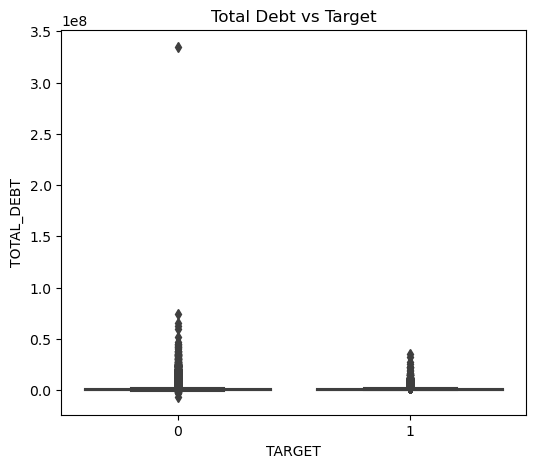

In [17]:
# Grafik 6: Total Debt vs Target
plt.figure(figsize=(6,5))
sns.boxplot(x='TARGET', y='TOTAL_DEBT', data=app_train_enriched)
plt.title("Total Debt vs Target")
plt.show()

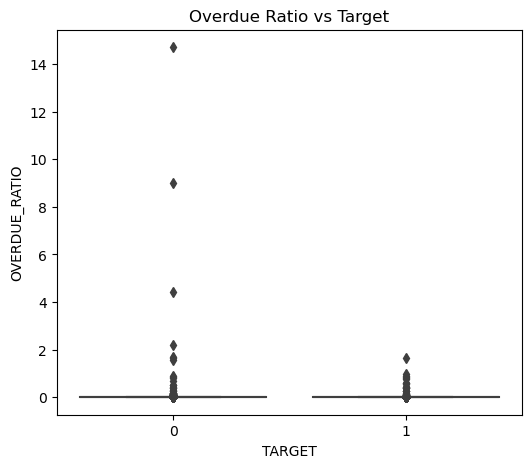

In [18]:
# Grafik 7: Overdue Ratio vs Target
plt.figure(figsize=(6,5))
sns.boxplot(x='TARGET', y='OVERDUE_RATIO', data=app_train_enriched)
plt.title("Overdue Ratio vs Target")
plt.show()

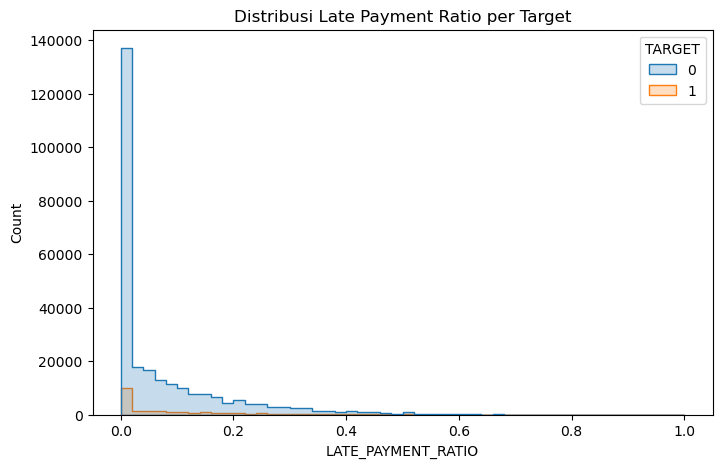

In [19]:
# Grafik 8: Distribusi Late Payment Ratio per Target
plt.figure(figsize=(8,5))
sns.histplot(data=app_train_enriched, x='LATE_PAYMENT_RATIO', hue='TARGET', bins=50, element="step", stat="count")
plt.title("Distribusi Late Payment Ratio per Target")
plt.show()

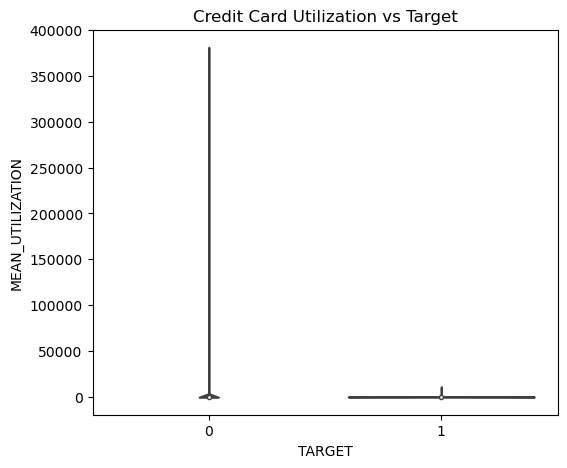

In [20]:
# Grafik 9: Credit Card Utilization vs Target
plt.figure(figsize=(6,5))
sns.violinplot(x='TARGET', y='MEAN_UTILIZATION', data=app_train_enriched, inner="box")
plt.title("Credit Card Utilization vs Target")
plt.show()

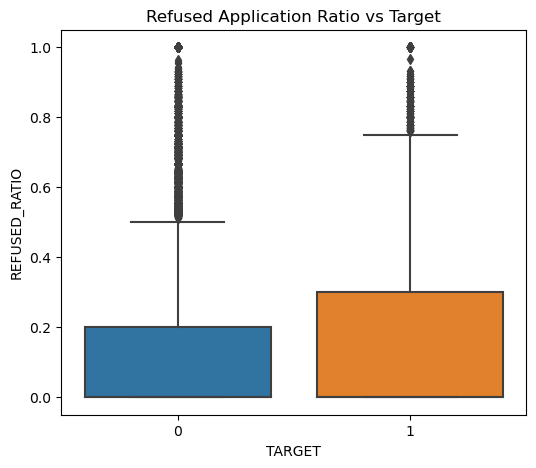

In [21]:
# Grafik 10: Refused Application Ratio vs Target
plt.figure(figsize=(6,5))
sns.boxplot(x='TARGET', y='REFUSED_RATIO', data=app_train_enriched)
plt.title("Refused Application Ratio vs Target")
plt.show()